In [17]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import kaleido
import plotly.io as pio
pio.kaleido.scope.mathjax = None
import os

In [18]:
latest_results = os.listdir('../results')
latest_results = [f for f in latest_results if f.endswith('.csv') and 'clip_analysis' in f]
latest_results = sorted(latest_results, key=lambda x: os.path.getmtime(os.path.join('../results', x)))[-1]
df = pd.read_csv(os.path.join('../results', latest_results))
print(latest_results)
df.rename(columns={'class_set': 'experiment', 'class_name': 'prompt'}, inplace=True)
df

clip_analysis_20250510_161715.csv


,word,color,experiment,prompt,probability
0,BLUE,red,meaning_only,"The word ""BLUE""",0.995066
1,BLUE,red,meaning_only,"The word ""RED""",0.004934
2,BLUE,red,color_only,A word colored in blue,0.933951
3,BLUE,red,color_only,A word colored in red,0.066049
4,BLUE,red,combined,"The word ""BLUE""",0.667955
5,BLUE,red,combined,"The word ""RED""",0.003312
6,BLUE,red,combined,A word colored in blue,0.307021
7,BLUE,red,combined,A word colored in red,0.021712
8,BLUE,blue,meaning_only,"The word ""BLUE""",0.999564
9,BLUE,blue,meaning_only,"The word ""RED""",0.000436


In [19]:
df['condition'] = np.where(df['word'].str.lower() == df['color'].str.lower(), 'congruent', 'incongruent')
df.loc[df['word'] == 'XXXX', 'condition'] = 'neutral'
# Initialize correct column
df['correct'] = False
# Extract response word and color from class_name
df['prompt_word'] = df['prompt'].str.extract('word "(\\w+)"')
df['prompt_color'] = df['prompt'].str.extract('colored in (\\w+)')

In [20]:

# For meaning_only class set, correct answer is based on the word
df.loc[df['experiment'] == 'meaning_only', 'correct'] = (
    df['prompt_word'] == df['word']
)

# For color_only class set, correct answer is based on the color
df.loc[df['experiment'] == 'color_only', 'correct'] = (
    df['prompt_color'] == df['color']
)

# For combined class set, correct answer is based on both word and color
df.loc[df['experiment'] == 'combined', 'correct'] = (
    df['prompt_word'] == df['word'] 
) | (
    df['prompt_color'] == df['color']
)

In [58]:
prompts = df["prompt"].unique()
df['correct_str'] = df['correct'].map({True: "✔", False: "✗"})
df['prompt_str'] = '‘' + df['prompt'] + "’"
x_range = None
for experiment, experiment_df in df.groupby("experiment"):
    fig = px.bar(
        experiment_df,
        x="color",
        y="probability",
        color="prompt",
        text="correct_str",
        facet_col="word",
        color_discrete_map={"A word colored in blue": "blue", 
                            "A word colored in red": "red",
                            'The word "BLUE"': "blue",
                            'The word "RED"': "red"},
        pattern_shape="prompt",
        pattern_shape_map={"A word colored in blue": "", 
                            "A word colored in red": "",
                            'The word "BLUE"': "/",
                            'The word "RED"': "/"},
        hover_data=df.columns.tolist(),
        labels={"probability": "Probability", 
                "experiment": "Experiment", 
                'prompt_str': 'Prompt'},
        barmode="group",
        category_orders={"prompt": prompts, "color": ['blue','red'], "word": ["BLUE","RED","XXXX"]},
        width=600,
        height=250
        #range_x=[0, 1],
    )
    # remove Word= from the facet col 
    fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
    fig.update_xaxes(title='')
    # add super x-label without arrow
    fig.add_annotation(x=0.5, y=-0.3, 
                       text="Color", 
                       xref='paper', yref='paper',
                       showarrow=False
                       )
    fig.add_annotation(x=0.5, y=+1.3, 
                text="Word", 
                xref='paper', yref='paper',
                showarrow=False
                )

    fig.update_yaxes(tickvals=[0, 0.5, 1], ticktext=["0", "0.5", "1"])
    fig.update_layout(margin=dict(l=50, r=50, t=50, b=60))


    # get current x-axis range

    fig.show()
    fig.write_image(f'../results/figures/{experiment}.png', scale=3)
    

In [128]:
df['experiment'].value_counts()

experiment
combined        24
meaning_only    12
color_only      12
Name: count, dtype: int64

In [74]:
df['experiment_str'] = df['experiment'].map({"color_only": "Color", "meaning_only": "Word", "combined": "Combined"})
fig = px.box(df[df['correct']], 
       y='probability', 
       color='condition',
       color_discrete_map={'congruent':'blue', "incongruent": 'red', "neutral": 'green'},
       x='experiment_str',
       category_orders={'correct':[False, True], 
                        'experiment_str': ['Color','Word', 'Combined'],
                        'condition': ['congruent','incongruent', 'neutral']
                        },
       width=600, height=300, 
       )
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title='')
fig.add_annotation(x=0.5, y=-0.2, text="Experiment", showarrow=False, xref="paper", yref="paper")
#fig.add_annotation(x=0.5, y=1.3, text="Experiment", showarrow=False, xref="paper", yref="paper")
# make the figure tight:
fig.update_layout(margin=dict(l=50, r=50, t=10, b=60))

fig.show()

fig.write_image(f'../results/figures/probability_conditioned.png', scale=3)


In [7]:
# anova
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [51]:
latex_df=df[['experiment','word','color',	'prompt', 'probability','condition','correct']]
latex_df = latex_df.sort_values(by=['experiment','word','color','prompt'])# change probability to 2 decimal places
latex_df['probability'] = latex_df['probability'].round(2)
latex_df.reset_index(drop=True).to_clipboard()

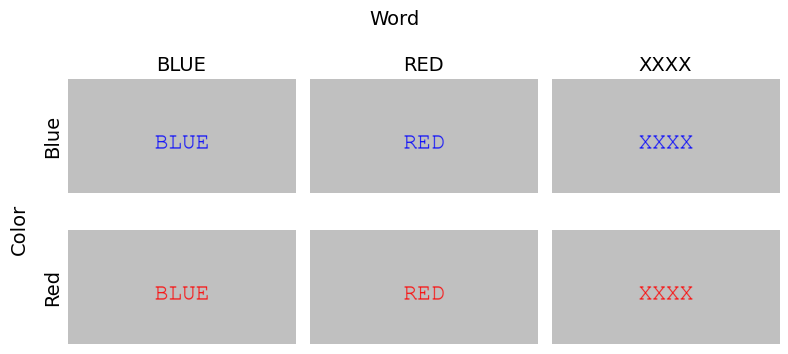

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Define the grid
words = ["BLUE", "RED", "XXXX"]
colors = [("blue", "0_0_255"), ("red", "255_0_0")]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4))
#fig.suptitle("Stroop Stimuli (Columns: Word, Rows: Color)", fontsize=16)

for row, (color_name, rgb) in enumerate(colors):
    for col, word in enumerate(words):
        fname = f"{word}_{rgb}.png"
        fpath = os.path.join("../stimuli_images", fname)
        ax = axes[row, col]
        if os.path.exists(fpath):
            img = mpimg.imread(fpath)
            ax.imshow(img)
        ax.set_xticks([])
        ax.set_yticks([])
        if row == 0:
            ax.set_title(word, fontsize=14)
        if col == 0:
            ax.set_ylabel(color_name.capitalize(), fontsize=14)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
# add super x-label
fig.supxlabel('Word', fontsize=14, y=1)
fig.supylabel('Color', fontsize=14)
plt.tight_layout()
fig.savefig('../results/figures/stimuli.png', dpi=200, bbox_inches='tight')